机器学习已经不仅仅只是一个未来幻想了，它已经存在了。事实上，在某些专门领域的应用中，例如光学字符识别（OCR），它甚至已经存在了几十年。但是，第一个真正成为主流并改善了亿万人民生活的机器学习应用，是20世纪90年代席卷了全世界的垃圾邮件过滤器。它不算是一个有自我意识的天网（Skynet），但从技术上来讲，它确实有资格称为一种机器学习。随后便是数以百计的机器学习应用，默默地为产品和功能提供支持，从更好的推荐系统到语音搜索。

在开始探索机器学习的新大陆之前，先来看看地图，了解一下主要地区和最显著的地标：监督式与无监督式学习，在线学习与批量学习，基于实例的与基于模型的学习。然后，将介绍一个典型的机器学习项目的工作流程，讨论可能会面临的主要挑战，并介绍如何对机器学习系统进行评估和微调。

本章会介绍许多基本的概念（和术语），每一个数据科学家都应该对此烂熟于心。本章是一个高度概括性的介绍（唯一没有太多代码的章节），所述知识也都很简单，但是在阅读本书的其余部分之前，一定要确保清晰透彻地理解了本章的内容。

> 这部分主要是方法论，非常重要！


## 什么是机器学习

机器学习是一门能够让编程计算机从数据中学习的计算机科学（和艺术）。

这里有一个略微笼统的定义：

机器学习研究如何让计算机不需要明确的程序也能具备学习能力。（——Arthur Samuel，1959）

还有一个更偏工程化的定义：

一个计算机程序在完成任务T之后，获得经验E，其表现效果为P，如果任务T的性能表现，也就是用以衡量的P，随着E的增加而增加，可以称其为学习。（——Tom Mitchell，1997）

举例来说，垃圾邮件过滤器就是一个机器学习的程序，它通过垃圾邮件（比如用户手动标记的垃圾邮件）以及常规邮件（非垃圾邮件）的示例，来学习标记垃圾邮件。系统用来学习的这些示例，称之为训练集。每一个训练示例称为训练实例或者是训练样本。在本例中，任务T就是给新邮件标记垃圾邮件，经验E则是训练数据，那么衡量性能表现的指标P则需要我们来定义，例如，可以使用被正确分类的邮件的比率来衡量。这个特殊的性能衡量标准称为精度，经常用于衡量分类任务。

## 为什么要使用机器学习

试想一下，如果让你使用传统编程技术来编写一个垃圾邮件过滤器，会怎么做：
![传统编程方法](images/VNote/20200628163308700_21136.png)

1. 看看垃圾邮件通常长什么样。注意到某些单词或用语（比如“4U”“信用卡”“免费”以及“神奇的”等字眼）在这类主题中出现的频率非常高；也许还会在发件人名称和邮件的正文中发现一些其他的模式。

2. 为发现的每个模式编写检测算法，如果检测到一定数量的这类模式，程序会将其标记为垃圾邮件。

3. 测试这个程序，不断地重复过程1和过程2，直到它变得足够好。

而这些问题都并不简单，因此程序很可能变成一长串的复杂规则——很难维护。

相比之下，基于机器学习技术的垃圾邮件过滤器通过对比垃圾邮件示例和常规邮件示例，自动检测垃圾邮件中异常频繁的单词模式，自动学习哪些单词和短语可以作为垃圾邮件的预测因素。这样的程序要简短得多，易于维护，并且可能还更准确。

![机器学习解决方法](images/VNote/20200628163435433_20776.png)


此外，如果垃圾邮件发送者注意到所有包含“4U”字眼的电子邮件都被阻止，他们很可能会开始写成“For U”。使用传统编程技术的垃圾邮件过滤器需要更新才能标记“For U”的邮件。而如果垃圾邮件发送者持续围绕着过滤器来工作，那需要永无止境地续写新的过滤规则。

相比之下，基于机器学习技术的垃圾邮件过滤器可以自动注意到“For U”开始在用户标记的垃圾邮件中出现得异常频繁，不需要人为干预，就会开始自动标记它们。

![自动适应变化](images/VNote/20200628163552474_1738.png)

机器学习的另一个闪光点，是针对那些使用传统方法太过复杂——甚至根本不存在已知算法的问题。例如语音识别：假如想写一个能够区分出“一”和“二”的程序。会想到，“二”（two）的读音是以一个高音（“T”）开始，所以可以硬编码出一个测量高音强度的算法，然后用它来区分“一”和“二”。但是想想数以百万计的不同人群所说的成千上万的词句，加之其所处的吵闹环境，以及所使用的几十种不同的语言，很显然，这种技术不可能得以扩展。迄今为止，最好的解决方案是写一个能够自己学习的算法，然后针对每个字给它提供许多录音示例。

最后，机器学习还可以帮助人类学习：通过检视机器学习算法以了解它们学到了什么（尽管对于某些算法来说，这可能挺棘手）。例如，一旦垃圾邮件过滤器经过了足够多的训练，可以很轻松地检视它，查看它认为的可以作为垃圾邮件最佳预判因子的单词及单词组合的列表。有时候，这可能会揭示出一些人类未曾意识到的关联性或是新趋势，从而帮助更好地理解问题。

应用机器学习技术来挖掘海量数据，可以帮助发现那些此前并非立见端倪的模式。这个过程称为`数据挖掘`。

![机器学习可以帮助人类学习](images/VNote/20200628164112642_25811.png)

简而言之，机器学习的伟大在于：

* 对于那些现有解决方案需要大量手动调整或者是规则列表超长的问题：通过一个机器学习的算法就可以简化代码，并且提升执行表现。

* 对于那些传统技术手段根本无法解决的复杂问题：通过最好的机器学习技术可以找到一个解决方案。

* 对于环境波动：机器学习系统可以适应新的数据。

* 从复杂问题和海量数据中获得洞见。

## 机器学习系统的种类

现有的机器学习系统种类繁多，为便于理解根据以下内容将它们进行大的分类：

* 是否在人类监督下训练（监督式学习、无监督式学习、半监督式学习和强化学习）

* 是否可以动态地进行增量学习（在线学习和批量学习）

* 是简单地将新的数据点和已知的数据点进行匹配，还是像科学家那样，对训练数据进行模式检测，然后建立一个预测模型（基于实例的学习和基于模型的学习）

这些标准之间互相并不排斥，可以以你喜欢的方式将其任意组合。例如，现在最先进的垃圾邮件过滤器可能是使用深度神经网络模型对垃圾邮件和常规邮件进行训练，完成动态学习。这使其成为一个在线的、基于模型的、监督式学习系统。

我们来看看这几个标准。

### 监督式/无监督式学习

根据训练期间接受的监督数量和监督类型，可以将机器学习系统分为以下四个主要类别：监督式学习、无监督式学习、半监督式学习和强化学习。

#### 监督式学习

在监督式学习中，提供给算法的包含所需解决方案的训练数据，称为标签或标记（见图1-5）。

![监督式学习中被标记的训练集（例如，垃圾邮件分类）](images/VNote/20200628165010340_21595.png)

分类任务是一个典型的监督式学习任务。垃圾邮件过滤器就是个很好的例子：通过大量的电子邮件示例及其所属的类别（垃圾邮件或是常规邮件）进行训练，然后学习如何对新邮件进行分类。

还有典型的任务，是通过预测变量，也就是一组给定的特征（里程、使用年限、品牌等）来预测一个目标数值，例如汽车的价格。这种类型的任务称为回归任务（见图1-6） [1] 。要训练这样一个系统，需要提供大量的汽车示例，包括它们的预测变量和标签（也就是它们的价格）。

![回归任务](images/VNote/20200628165117977_5514.png)

 在机器学习里，属性是一种数据类型（例如“里程”）；而特征取决于上下文，可能有多个含义，但是通常状况下，特征意味着一个属性加上其值（例如，“里程=15000”）。尽管如此，许多人还是会可交接地使用属性和特征这两个名词。

值得注意的是，一些回归算法也可以用于分类任务，反之亦然。例如，逻辑回归就被广泛地用于分类，因为它可以输出“属于某个给定类别的概率”的值（例如，20%的概率是垃圾邮件）。

这里是一些最重要的监督式学习的算法：

* K-近邻算法（k-Nearest Neighbors）

* 线性回归（Linear Regression）

* 逻辑回归（Logistic Regression）

* 支持向量机（Support Vector Machines，SVM）

* 决策树和随机森林（Decision Trees and Random Forests）

* 神经网络（Neural networks） [2]

#### 无监督式学习

顾名思义，无监督式学习的`训练数据都是未经标记`的。系统会在没有人干预的情况下进行学习。

![无监督式学习的未标记训练集](images/VNote/20200629162727999_3646.png)

这里有一些最重要的无监督式学习的算法：

* 聚类算法

* k-平均算法（k-Means）

* 分层聚类分析（Hierarchical Cluster Analysis，HCA）

* 最大期望算法（Expectation Maximization）

* 可视化和降维

* 主成分分析（PCA）

* 核主成分分析（Kernel PCA）

* 局部线性嵌入（LLE）

* t-分布随机近临嵌入（t-SNE）

* 关联规则学习

* Apriori

* Eclat

例如，假设现在拥有大量的自己博客访客的数据。想通过一个聚类算法来检测相似访客的分组。不大可能告诉这个算法每个访客属于哪个分组——希望算法自己去寻找这种关联，而无须帮助。比如，它可能会注意到40%的访客是喜欢漫画的男性，并且通常在夜晚阅读博客，20%的访客是年轻的科幻爱好者，通常在周末访问，等等。如果使用的是层次聚类的算法，它还可以将每组细分为更小的组。这可能有助于针对不同的分组来发布博客内容。

![聚类](images/VNote/20200629162820775_15025.png)


可视化算法也是无监督式学习算法的好例子：提供大量复杂的、未标记的数据，得到轻松绘制而成的2D或3D的数据呈现作为输出。这些算法会尽其所能地保留尽量多的结构（例如，尝试保持让输入的单独集群在可视化中不会被重叠），以便于理解这些数据是怎么组织的，甚至识别出一些未知的模式。

![一个使用t-SNE算法的可视化示例，突显了各种语义簇](images/VNote/20200629162934046_12822.png)

与之相关的另一种任务是`降维`，降维的目的是在不丢失太多信息的前提下简化数据。方法之一是将多个相关特征合并为一个。例如，汽车的里程与其使用年限存在很大的相关性，所以降维算法会将它们合并成一个代表汽车磨损的特征。这个过程叫作`特征提取`。

> 通常比较好的做法是，先使用降维算法减少训练数据的维度，再将其提供给另一个机器学习算法（例如监督式学习算法）。这会使它运行得更快，数据占用的磁盘空间和内存都会更小，在某些情况下，执行性能也会更好。

另一个很重要的无监督式任务是`异常检测`——例如，检测异常信用卡交易从而防止欺诈，捕捉制造缺陷，或者是在提供数据给一种机器学习算法之前，自动从数据集中移除异常值。系统用正常实例进行训练，然后当看到新的实例时，它就可以判断出这个新实例看上去是正常还是异常。

![异常检测](images/VNote/20200629163524318_29273.png)

最后，还有一个常见的无监督式任务是`关联规则学习`，其目的是挖掘大量数据，发现属性之间的有趣联系。比如，假设一家超市，在销售日志上运行关联规则之后发现买烧烤酱和薯片的人也倾向于购买牛排。那么，可能会将这几样商品摆放得更近一些。

#### 半监督式学习

有些算法可以处理部分标记的训练数据——通常是大量未标记数据和少量的标记数据。这称为半监督式学习。

![半监督式学习](images/VNote/20200629163717566_10284.png)

有些照片托管服务（例如Google相册）就是很好的例子。一旦将所有的家庭照片上传到服务器后，它会自动识别出人物A出现在照片1、5和11中，人物B出现在照片2、5和7中。这是算法中无监督的部分（聚类）。现在系统需要你做的只是，告诉它这些人都是谁。给每个人一个标签之后，它就可以给每张照片中的每个人命名，这对于搜索图片非常重要。

大多数半监督式学习算法是无监督式和监督式算法的结合。例如`深度信念网络`（DBN），它基于一种互相堆叠的无监督式组件，这个组件叫作`受限玻尔兹曼机`（RBM）。受限玻尔兹曼机以无监督的方式进行训练，然后使用监督式学习对整个系统进行微调。

### 强化学习

强化学习则是一个非常与众不同的“巨兽”。它的学习系统（在其语境中称为智能体）能够观察环境，做出选择，执行操作，并获得回报（reward），或者是以负面回报的形式获得惩罚。所以它必须自行学习什么是最好的策略（policy），从而随着时间推移获得最大的回报。策略代表智能体在特定情况下应该选择的操作。

![强化学习](images/VNote/20200629164106086_9489.png)


例如，许多机器人通过强化学习算法来学习如何行走。DeepMind的AlphaGo项目也是一个强化学习的好例子。2016年3月，AlphaGo在围棋比赛中击败世界冠军李世石而声名鹊起。通过分析数百万场比赛，然后自己跟自己下棋，它学到了制胜策略。要注意，在跟世界冠军对弈的时候，AlphaGo处于关闭学习状态，它只是应用它所学到的策略而已。

### 批量学习和在线学习

还有一个给机器学习系统分类的标准，是看系统是否可以从传入的数据流中进行增量学习。

#### 批量学习

在批量学习中，系统无法进行增量学习——即必须使用所有可用数据进行训练。这需要大量时间和计算资源，所以通常情形下，都是离线完成的。离线学习就是先训练系统，然后将其投入生产环境，这时学习过程停止，它只是将其所学到的应用出来。

如果希望批量学习系统学习新数据（例如新型垃圾邮件），需要在完整数据集（不仅仅是新数据，还要包括旧数据）的基础上重新训练一个新版本的系统，然后停用旧系统，用新系统取而代之。

幸运的是，整个训练、评估和启动机器学习系统的过程可以很轻易地实现自动化，所以即使是批量学习系统也能够适应变化。只是需要不断地更新数据，并根据需要频繁地训练新版本的系统。

![在线学习](images/VNote/20200629164514191_3251.png)

这个解决方法比较简单，通常情况下也都能正常工作，只是每次都使用全套数据集进行训练可能需要花上好几个小时，所以，很有可能会选择每天甚至每周训练一次新系统。如果系统需要应对快速变化的数据（例如，预测股票价格），那么需要一个更具响应力的解决方案。

此外，使用完整数据训练需要耗费大量的计算资源（CPU、内存空间、磁盘空间、磁盘I/O、网络I/O等）。如果数据量非常大，并且每天从零开始自动执行训练系统，那最终将为此花费大量的金钱。而假如面对的是海量数据，甚至可能无法再应用批量学习算法。

所以如果你的资源有限（例如，智能手机应用程序或者是火星上的漫游器），而系统需要实现自主学习，那么像这样携带大量训练数据，占用大量资源，动辄每天耗费几小时来进行训练的方式，肯定是心有余而力不足。

幸运的是，在所有这些情况下，有了一个更好的选择——也就是能够进行增量学习的算法。

#### 在线学习

在在线学习中，可以循序渐进地给系统提供训练数据，逐步积累学习成果。这种提供数据的方式可以是单独的，也可以采用小批量（mini-batches）的小组数据来进行训练。每一步学习都很快速并且便宜，所以系统就可以根据飞速写入的最新数据进行学习。

对于这类系统——需要接收持续的数据流（例如股票价格）同时对数据流的变化做出快速或自主的反应，使用在线学习系统是一个非常好的方式。如果计算资源有限，在线学习系统同样也是一个很好的选择：新的数据实例一旦经过系统的学习，就不再需要，你可以将其丢弃（除非想要回滚到前一个状态，再“重新学习”数据），这可以节省大量的空间。

对于超大数据集——超出一台计算机的主存储器的数据，在线学习算法也同样适用（这称为`核外学习`）。算法每次只加载部分数据，并针对这部分数据进行训练，然后不断重复这个过程，直到完成所有数据的训练。

![使用在线学习处理超大数据集](images/VNote/20200629164931566_20106.png)

> 整个过程通常是离线完成的（也就是不在live系统上），因此在线学习这个名字很容易让人产生误解。可以将其视为`增量学习`。

在线学习系统的一个重要参数是其适应不断变化的数据的速度，这就是所谓的学习率。如果设置的学习率很高，那么系统将会迅速适应新数据，但同时也会很快忘记旧数据（肯定不希望垃圾邮件过滤器只对最新显示的邮件进行标记）。反过来，如果学习率很低，系统会有更高的惰性，也就是说，学习会更缓慢，同时也会对新数据中的噪声或者非典型数据点的序列更不敏感。

在线学习面临的一个重大挑战是，如果给系统输入`不良数据`，系统的性能将会逐渐下降。现在某些实时系统的客户说不定已经注意到了这个现象。不良数据的来源可能是，例如，机器上发生故障的传感器，或者是有人对搜索引擎恶意刷屏以提高搜索结果排名等。为了降低这种风险，需要密切监控系统，一旦检测到性能下降，要及时中断学习（可能还需要恢复到之前的工作状态）。当然，同时还需要监控输入数据，并对异常数据做出响应（例如，使用异常检测算法）。

### 基于实例与基于模型的学习

另一种对机器学习系统进行分类的方法是看它们如何`泛化`。大多数机器学习任务是要做出`预测`。这意味着，系统需要通过给定的训练示例，在它此前并未见过的示例上进行泛化。在训练数据上实现良好的性能指标固然重要，但是还不够充分；真正的目的是要在新的对象实例上表现出色。

泛化的主要方法有两种：基于实例的学习和基于模型的学习。

#### 基于实例的学习

最司空见惯的学习方法就是简单的死记硬背。如果以这种方式创建一个垃圾邮件过滤器，那它可能只会标记那些跟已被用户标记为垃圾邮件完全相同的邮件——这虽然不是最差的解决方案，但肯定也不是最好的。

除了完全相同的，你还可以通过编程让系统标记与已知的垃圾邮件非常相似的邮件。这里需要两封邮件之间的相似度度量。有一种（基本的）相似度度量方式，是计算它们之间相同的单词数目。如果一封新邮件与一封已知的垃圾邮件有许多字句相同，系统就可以将其标记为垃圾邮件。

这便是基于实例的学习：系统先完全记住学习示例（example），然后通过某种相似度度量方式将其泛化到新的实例。

![基于实例的学习](images/VNote/20200629170032516_9151.png)

#### 基于模型的学习

从一组示例集中实现泛化的另一种方法是构建这些示例的模型，然后使用该模型进行预测。这就是基于模型的学习。

![基于模型的学习](images/VNote/20200629170124785_1314.png)

举例来说，假设想知道金钱是否让人感到快乐，可以从经合组织（OECD）的网站（ https://goo.gl/0Eht9W ）上下载“幸福指数”的数据，再从国际货币基金组织（IMF）的网站（ http://goo.gl/j1MSKe ）上找到人均GDP的统计数据，将数据并入表格，按照人均GDP排序，会得到下表。

|   国家   | 人均GDP | 幸福指数 |
| ------- | ------- | ------- |
| 匈牙利   | 12240   | 4.9     |
| 韩国     | 27195   | 5.8     |
| 法国     | 37675   | 6.5     |
| 澳大利亚 | 50962   | 7.3     |
| 美国     | 55805   | 7.2     |

随机绘制几个国家的数据。

In [1]:
# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)
    
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [2]:
datapath = os.path.join("datasets", "lifesat", "")

In [3]:
# Load Better Life Index
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
#oecd_bli.head(2)
#oecd_bli["Life satisfaction"].head()

In [4]:
# Load GDP
gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
# gdp_per_capita.head(2)
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
# full_country_stats.head()

In [5]:
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

Saving figure money_happy_scatterplot


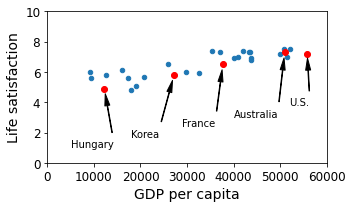

In [6]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
save_fig('money_happy_scatterplot')
plt.show()

这里似乎有一个趋势！虽然数据包含噪声（即部分随机），但是仍然可以看出随着国内生产总值的增加，生活满意度或多或少呈线性上升的趋势。所以可以把生活满意度建模成一个关于人均GDP的线性函数。这个过程叫作模型选择。为生活满意度选择了一个线性模型，该模型只有一个属性，就是人均GDP。

$BLI = \theta_0+\theta_1\times GDP/capita$

这个模型有两个参数，$\theta_0$和$\theta_1$。通过调整这两个参数，可以用这个模型来代表任意线性函数。

Saving figure tweaking_model_params_plot


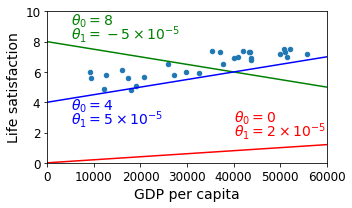

In [7]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, 2*X/100000, "r")
plt.text(40000, 2.7, r"$\theta_0 = 0$", fontsize=14, color="r")
plt.text(40000, 1.8, r"$\theta_1 = 2 \times 10^{-5}$", fontsize=14, color="r")
plt.plot(X, 8 - 5*X/100000, "g")
plt.text(5000, 9.1, r"$\theta_0 = 8$", fontsize=14, color="g")
plt.text(5000, 8.2, r"$\theta_1 = -5 \times 10^{-5}$", fontsize=14, color="g")
plt.plot(X, 4 + 5*X/100000, "b")
plt.text(5000, 3.5, r"$\theta_0 = 4$", fontsize=14, color="b")
plt.text(5000, 2.6, r"$\theta_1 = 5 \times 10^{-5}$", fontsize=14, color="b")
save_fig('tweaking_model_params_plot')
plt.show()

在使用模型之前，需要先定义参数$\theta_0$和$\theta_1$的值。怎么才能知道什么值可以使得模型表现最佳呢？要回答这个问题，需要先确定怎么衡量模型的性能表现。要么定义一个`效用函数`（或适应度函数）来衡量模型有多好，要么定义一个`成本函数`来衡量模型有多差。对于`线性回归问题`，通常的选择是使用成本函数来衡量线性模型的预测与训练实例之间的差距，目的在于尽量使这个`差距最小化`。

In [8]:
from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
t0, t1

(4.853052800266436, 4.911544589158484e-05)

这正是线性回归算法的意义所在：通过提供的训练样本，找出最符合所提供数据的线性模型的参数，这就是训练模型的过程。在这个案例中，算法找到的最优参数值为$\theta_0 = 4.85$和$\theta_1 = 4.91\times 10^{-5}$

现在，（对于线性模型而言）模型基本接近训练数据。

Saving figure best_fit_model_plot


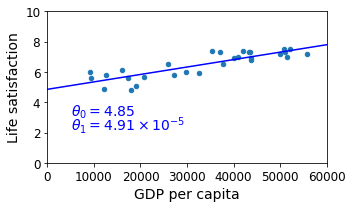

In [9]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
save_fig('best_fit_model_plot')
plt.show()

现在终于可以运用模型来进行预测了。例如，想知道塞浦路斯的人民有多幸福，但是经合组织的数据没有提供答案。幸好有这个模型可以做出预测：先查查塞浦路斯的人均GDP是多少，即22587美元，然后应用到模型中，发现生活满意度大约是$4.85+22587 \times 4.91 \times 10^{-5} = 5.96$。

下面的示例是一段加载数据的Python代码，包括准备数据，创建一个可视化的散点图，然后训练线性模型并做出预测。

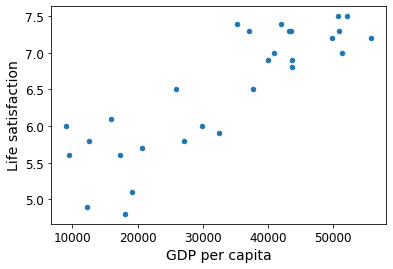

[[5.96242338]]


In [10]:
# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

如果使用基于实例的学习算法，会发现斯洛文尼亚的人均GDP最接近塞浦路斯（20732美元），而经合组织的数据告诉我们，斯洛文尼亚人民的生活满意度是5.7，因此很可能会预测塞浦路斯的生活满意度为5.7。如果稍微拉远一些，看看两个与之最接近的国家——葡萄牙和西班牙的生活满意度分别为5.1和6.5。取这三个数值的平均值，得到5.77，这也非常接近基于模型预测所得的值。这个简单的算法被称为`k-近邻回归算法`（在本例中，k=3）。要将前面代码中的线性回归模型替换为`k-近邻回归`模型非常简单，只需要将下面这行代码：
```
clf = sklearn.linear_model.LinearRegression()
```
替换为：
```
clf = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
```
如果一切顺利，模型将会做出很棒的预测。如果不行，可能需要使用更多的属性（例如就业率、健康、空气污染等），或者是获得更多或更高质量的训练数据，再或者是选择一个更强大的模型（例如，多项式回归模型）。

In [11]:
import sklearn.neighbors

# Select a K-means model
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

[[5.76666667]]


简而言之：

* 学习数据。

* 选择模型。

* 使用训练数据进行训练（即前面学习算法搜索模型参数值，从而使成本函数最小化的过程）。

* 最后，应用模型对新示例进行预测（称为推断），`祈祷`模型的泛化结果不错。

以上就是一个典型的机器学习项目，后面，还将通过一个端到端的项目来体验这一切。

到目前为止，已经介绍了多个领域：已经知道了什么是真正的机器学习，它为何有用，机器学习系统最常见的类别有哪些，以及典型的项目工作流程。现在看看在学习过程中可能会遇到哪些阻碍做出准确预测的问题。

> [1] 一则趣事：这个读起来很奇怪的名字（regression）是弗兰西斯·加尔顿提出的统计学术语，当时他正研究一个现象，那就是高个父母的孩子往往比他们要矮一些。由于高个父母的孩子在变矮，他就把这个趋势称为均数回归。后来这个名词就被他用于分析变量之间相关性的方法。

> [2] 某些神经网络架构可以是无监督式的，例如自动编码器和受限玻尔兹曼机；也可能是半监督式的，例如深度信念网络和无监督的预训练。

> [3] 注意它是如何很好地区分开动物和车辆的，以及马是如何更接近鹿而远离鸟类的，等等。图表转载许可来自于Socher、Ganjoo、Manning和Ng(2013)，“T-SNE visualization of the semantic word space”。

> [4] 这是在系统完美工作的情况下。在实践中，通常会为每个人创造多个集群，有时也会混淆两个看起来相似的人，因此你需要为每个人提供多个标记，同时手动清理一些集群。

> [5] 按照惯例，通常用希腊字母$\theta$来表示模型参数。

## 机器学习的主要挑战

简单来说，由于你的主要任务是选择一种学习算法，并对某些数据进行训练，所以最可能出现的两个问题不外乎是“坏算法”和“坏数据”，先从坏数据开始。

### 坏数据

#### 训练数据的数量不足

要教一个牙牙学语的小朋友什么是苹果，只需要指着苹果说“苹果”（可能需要重复这个过程几次）就行了，然后孩子就能够识别各种颜色和形状的苹果了，简直是天才！

机器学习还没达到这一步，大部分机器学习算法需要大量的数据才能正常工作。即使是最简单的问题，很可能也需要成千上万个示例，而对于诸如图像或语音识别等复杂问题，则可能需要上千万个示例（除非可以重用现有模型的某些部分）。

#### 数据的不合理有效性

在2001年发表的一篇著名论文中，微软研究员Michele Banko和Eric Brill表明，截然不同的机器学习算法（包括相当简单的算法）在自然语言歧义消除这个复杂问题上，表现几乎完全一致。

![数据对算法的重要性](images/VNote/20200630112644701_21296.png)

正如作者所说：“这些结果表明，我们可能会重新思考如何在二者之间做权衡——将钱和时间花在算法的开发上，还是花在语料库的建设上。”

对复杂问题而言，数据比算法更重要，这一想法被Peter Norvig等人进一步推广，于2009年发表论文《数据的不合理有效性》。不过需要指出的是，中小型数据集依然非常普遍，获得额外的训练数据并不总是一件轻而易举或物美价廉的事情，所以暂时先不要抛弃算法。

#### 训练数据不具代表性

为了很好地实现泛化，至关重要的一点是，对于将要泛化的新示例来说，训练数据一定要非常有代表性。不论使用的是基于实例的学习还是基于模型的学习，都是如此。

例如，前面用来训练线性模型的国家数据集并不具备完全的代表性，有部分国家的数据缺失。下图显示了补充缺失国家/地区信息之后的数据表现。

Saving figure representative_training_data_scatterplot


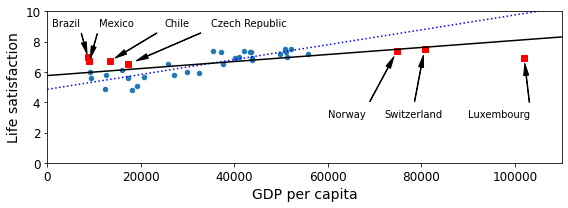

In [12]:
# missing_data
position_text2 = {
    "Brazil": (1000, 9.0),
    "Mexico": (11000, 9.0),
    "Chile": (25000, 9.0),
    "Czech Republic": (35000, 9.0),
    "Norway": (60000, 3),
    "Switzerland": (72000, 3.0),
    "Luxembourg": (90000, 3.0),
}

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

for country, pos_text in position_text2.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")

X=np.linspace(0, 110000, 1000)
plt.plot(X, t0 + t1*X, "b:")

lin_reg_full = linear_model.LinearRegression()
Xfull = np.c_[full_country_stats["GDP per capita"]]
yfull = np.c_[full_country_stats["Life satisfaction"]]
lin_reg_full.fit(Xfull, yfull)

t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]
X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "k")

save_fig('representative_training_data_scatterplot')
plt.show()

如果用这个数据集训练线性模型，将会得到图中的实线，而虚线表示旧模型。正如所见，添加部分缺失的国家信息不仅显著地改变了模型，也更清楚地说明，这种线性模型可能永远不会那么准确。看起来，某些非常富裕的国家并不比中等富裕国家幸福（事实上，看起来甚至是不幸福），反之，一些贫穷的国家也似乎比许多富裕国家更加快乐。

> 使用不具代表性的训练集训练出来的模型不可能做出准确的预估，尤其是针对那些特别贫穷或特别富裕的国家。

针对想要泛化的案例使用具有代表性的训练集，这一点至关重要。不过说起来容易，做起来难：如果样本集太小，将会出现采样噪声（即非代表性数据被选中）；而即便是非常大的样本数据，如果采样方式欠妥，也同样可能导致非代表性数据集，这就是所谓的采样偏差。

#### 关于采样偏差的一个著名案例

最著名的采样偏差的案例，发生在1936年美国总统大选期间，兰登对决罗斯福。《Literary Digest》当时举行了一次非常大范围的民意调查，向约1000万人发送邮件，并得到了240万个回复，因此做出了高度自信的预言——兰登将获得57%的选票。

结果恰恰相反，罗斯福赢得了62%的选票。问题就在于《Literary Digest》的采样方式：

1. 首先，为了获取发送民意调查的地址，《Literary Digest》采用了电话簿、杂志订阅名单、俱乐部会员名单等类似名簿。而所有这些名单上的人往往对富人有更大的偏好，也就更有可能支持共和党（即兰登）。

2. 其次，收到民意调查邮件的人中，不到25%的人给出了回复。这再次引入了采样偏差，那些不怎么关心政治的人，不喜欢《Literary Digest》的人以及其他的一些关键群体直接被排除在外了。这是一种特殊类型的采样偏差，叫作`无反应偏差`。

再举一个例子：假设想创建一个系统用来识别funk音乐视频。构建训练集的方法之一是直接在YouTube上搜索“funk music”，然后使用搜索结果的视频。但是，这其实基于一个假设——YouTube的搜索引擎返回的视频结果，是所有能够代表funk音乐的视频。而实际的搜索结果可能会更偏向于当前流行的音乐人（如果住在巴西，你会得到很多关于“funk carioca”的视频，这听起来跟James Brown完全不是一回事）。另一方面来讲，还能怎样获得更大的训练集呢？

#### 质量差的数据

显然，如果训练集满是错误、异常值和噪声（例如，差质量的测量产生的数据），系统将更难检测到低层模式，更不太可能表现良好。所以花时间来清理训练数据是非常值得的投入。事实上，大多数数据科学家都会花费很大一部分时间来做这项工作。例如：

* 如果某些实例明显是异常情况，要么直接将其丢弃，要么尝试手动修复错误，都会大有帮助。

* 如果某些实例缺少部分特征（例如，5%的顾客没有指定年龄），必须决定是整体忽略这些特征，还是忽略这部分有缺失的实例，又或者是将缺失的值补充完整（例如，填写年龄值的中位数），或者是训练一个带这个特征的模型，再训练一个不带这个特征的模型，等等。

#### 无关特征

正如常说的：垃圾入，垃圾出。只有训练数据里包含足够多的相关特征，以及较少的无关特征，系统才能够完成学习。一个成功的机器学习项目，关键部分是提取出一组好的用来训练的特征集，这个过程叫作`特征工程`，包括以下几点。

* 特征选择：从现有特征中选择最有用的特征进行训练。

* 特征提取：将现有特征进行整合，产生更有用的特征（正如前文提到的，降维算法可以提供帮助）。

* 通过收集新数据创造新特征。

### 坏算法
现在已经看了不少“坏数据”的例子，再来看几个“坏算法”的例子。

#### 训练数据过度拟合

假设你正在国外旅游，被出租车司机狠宰了一刀，你很可能会说，那个国家的所有出租车司机都是强盗。过度概括是我们人类常做的事情，不幸的是，如果我们不小心，机器很可能也会陷入同样的陷阱。在机器学习中，这称为`过度拟合`，也就是指模型在训练数据上表现良好，但是泛化时却不尽如人意。

下图显示了一个与训练数据过度拟合的、高阶多项式的生活满意度模型。虽然它在训练数据上的表现比简单的线性模型要好得多，但是真的敢相信它的预测吗？

/usr/local/lib/python3.6/dist-packages/numpy/lib/nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Saving figure overfitting_model_plot


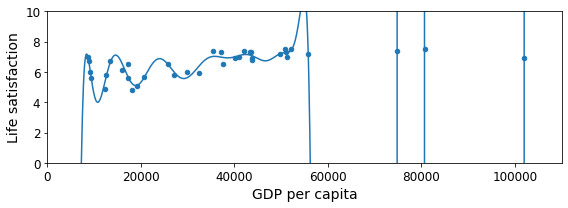

In [13]:
full_country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

from sklearn import preprocessing
from sklearn import pipeline

poly = preprocessing.PolynomialFeatures(degree=60, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lin_reg2)])
pipeline_reg.fit(Xfull, yfull)
curve = pipeline_reg.predict(X[:, np.newaxis])
plt.plot(X, curve)
save_fig('overfitting_model_plot')
plt.show()

诸如深度神经网络这类的复杂模型可以检测到数据中的微小模式，如果训练集本身是嘈杂的，或者说数据集太小（会导致采样噪声），那么很可能会导致模型检测噪声里的模式。很显然，这些模式不能泛化至新的实例。举例来说，假设给生活满意度模型提供了更多其他的属性，包括一些不具信息的属性例如国家的名字。在这种情况下，一个复杂模型可能会检测到这样的事实模式：训练数据中，名字中带有字母W的国家，如新西兰（New Zealand，生活满意度为7.3）、挪威（Norway，生活满意度为7.4）、瑞典（Sweden，生活满意度为7.2）和瑞士（Switzerland，生活满意度为7.5），生活满意度大于7。当把这个W规则泛化到卢旺达（Rwanda）或津巴布韦（Zimbabwe）时，对结果有多大的自信？显然，训练数据中的这个模式仅仅是偶然产生的，但是模型无法判断这个模式是真实的，还是噪声产生的结果。

当模型相对于训练数据的数量和噪度都过于复杂时，会发生过度拟合。可能的解决方案如下。

* 简化模型：可以选择较少参数的模型（例如，选择线性模型而不是高阶多项式模型），可以减少训练数据中的属性数量，又或者是约束模型。

* 收集更多的训练数据。

* 减少训练数据中的噪声（例如，修复数据错误和消除异常值）。

通过约束模型使其更简单，并降低过度拟合的风险，这个过程称为`正则化`。例如，前面定义的线性模型有两个参数，$\theta_0$和$\theta_1$。因此，该算法在拟合训练数据时，调整模型的自由度就等于2：它可以调整线的高度（$\theta_0$）和斜率（$\theta_1$）。如果强行让$\theta_0=0$，那么算法的自由度将会降为1，并且其拟合数据将变得更为艰难——它能做的全部就只是将线上移或下移来尽量接近训练实例，最后极有可能停留在平均值附近。这确实太简单了！如果允许算法修改$\theta_1$，但是强制它只能是很小的值，那么算法的自由度将位于1和2之间，这个模型将会比自由度为2的模型稍微简单一些，同时又比自由度为1的模型略微复杂一些。需要在完美匹配数据和保持模型简单之间找到合适的平衡点，从而确保模型能够较好地泛化。

Saving figure ridge_model_plot


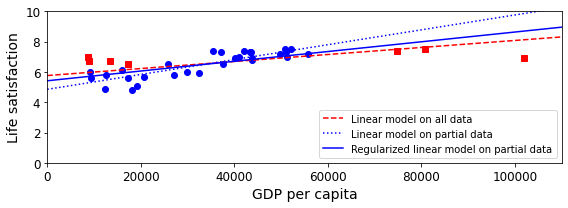

In [14]:
plt.figure(figsize=(8,3))

plt.xlabel("GDP per capita")
plt.ylabel('Life satisfaction')

plt.plot(list(sample_data["GDP per capita"]), list(sample_data["Life satisfaction"]), "bo")
plt.plot(list(missing_data["GDP per capita"]), list(missing_data["Life satisfaction"]), "rs")

X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "r--", label="Linear model on all data")
plt.plot(X, t0 + t1*X, "b:", label="Linear model on partial data")

ridge = linear_model.Ridge(alpha=10**9.5)
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
ridge.fit(Xsample, ysample)
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_[0][0]
plt.plot(X, t0ridge + t1ridge * X, "b", label="Regularized linear model on partial data")

plt.legend(loc="lower right")
plt.axis([0, 110000, 0, 10])
save_fig('ridge_model_plot')
plt.show()

上图显示了三个模型：蓝色虚线代表一开始的原始模型，也就是缺失部分国家的数据；红色虚线代表用所有国家数据训练的第二个模型；实线代表的模型与第一个模型使用的训练数据相同，但是应用了正则化的约束。可以看出通过正则化使得模型具有较小的斜率，这虽然略微降低了模型与训练数据的匹配度，但是能够更好地泛化至新的实例。

在学习时，应用正则化的程度可以通过一个超参数来控制。`超参数`是学习算法（不是模型）的参数。因此，**它不受算法本身的影响；它必须在训练之前设置好，并且在训练期间保持不变。** 如果将正则化超参数设置为非常大的值，会得到一个几乎平坦的模型（斜率接近零）；学习算法虽然肯定不会过度拟合训练数据，但是也更加不可能找到一个好的解决方案。调整超参数是构建机器学习系统非常重要的组成部分。

#### 训练数据拟合不足

`拟合不足`和过度拟合正好相反：它的产生通常是因为，对于下层的数据结构来说，模型太过简单。举个例子，用线性模型来描述生活满意度就属于拟合不足；现实情况远比模型复杂得多，所以即便是对于用来训练的示例，该模型产生的预测都一定是不准确的。

解决这个问题的主要方式有：

* 选择一个带有更多参数、更强大的模型

* 给学习算法提供更好的特征集（特征工程）

* 减少模型中的约束（比如，减少正则化超参数）

#### 退后一步

现在已经对机器学习有了一些了解。不过这么多概念，可能有点晕，暂且退后一步，纵观一下全局：

* 机器学习是关于如何让机器可以更好地处理某些特定任务的理论，它从数据中学习，而不是将规则进行清晰的编码。

* 机器学习系统有很多类型：监督式和无监督式，批量的和在线的，基于实例的和基于模型的，等等。

* 在一个机器学习项目中，从训练集中采集数据，然后将数据交给学习算法来计算。如果算法是基于模型的，它会调整一些参数来将模型适配于训练集（即对训练集本身做出很好的预测），然后算法就可以对新的场景做出合理的预测。如果算法是基于实例的，它会记住这些样例，并根据相似度来对新的实例进行泛化。

* 如果训练集的数据太少，数据代表性不够，包含太多噪声或者是被一些无关特征污染（垃圾进，垃圾出），那么系统将无法很好地工作。最后，模型既不能太简单（这会导致`拟合不足`），也不能太复杂（这会导致`过度拟合`）。

还有最后一个要讲的重要主题是：在训练好了一个模型之后，不能只是“希望”它可以正确地对新的场景做出泛化。还需要评估它，必要时做出一些调整。现在看看怎么做到这一点。

## 测试与验证

了解一个模型对于新场景的泛化能力的唯一办法就是，让模型真实地去处理新场景。做法之一是将其部署在生产环境，然后监控它的输出。这个方法用起来不错，不过如果模型非常糟糕，用户就会抱怨——所以这显然不是最好的办法。

更好的选择是将数据分割成两部分：`训练集`和`测试集`。顾名思义，可以用训练集的数据来训练模型，然后用测试集的数据来测试模型。应对新场景的误差率称为`泛化误差`（或者`样例外误差`），通过测试集来评估模型，就可以得到对这个误差的评估。这个估值可以告诉你，模型在处理新场景时的能力如何。

如果训练误差很低（模型对于训练集来说很少出错），但是泛化误差很高，那说明模型对于训练数据存在`过度拟合`。

> 通常使用80%的数据进行训练，保留另外的20%来做测试。

所以评估一个模型很简单：用测试集就行了。现在假设在两个模型（一个线性模型和一个多项式模型）之间犹豫不决：如何做出判断呢？做法是训练两个模型，然后对比它们对测试数据的泛化能力。

现在假设线性模型的泛化能力更强，但是想要应用一些正则化来避免过度拟合。问题又来了，要如何选择正则化超参数的值呢？做法之一是使用100个不同的超参数值来训练100个不同的模型。然后假设由此找到了最佳的超参数值，它生成的模型泛化误差最小，比如仅仅5%。

然后将这个模型运行在生产环境，可是很不幸，它并没有如预期那样工作，反而产生了15%的误差。这到底发生了什么？

问题出在对测试集的泛化误差进行了多次度量，并且调整模型和超参数来得到**拟合那个测试集**的最佳模型。这意味着该模型对于新的数据不太可能有良好的表现。

常见的解决方案是再单独分出来一个保留集合，称为`验证集`。在训练集上，使用不同的超参数训练多个模型，然后通过验证集，选择最好的那个模型和对应的超参数，当对模型基本满意之后，再用测试集运行最后一轮测试，并得到泛化误差的估值。

为了避免验证集“浪费”太多的训练数据，常见的技术是使用`交叉验证`：将训练集分成若干个互补子集，然后每个模型都通过这些子集的不同组合来进行训练，之后用剩余的子集进行验证。一旦模型和超参数都被选定，最终的模型会带着这些超参数对整个训练集进行一次训练，最后再用测试集测量泛化误差。

### 没有免费的午餐（No Free Lunch）定理

**模型是观察的`简化`**。这个简化是丢弃了那些不大可能泛化至新实例上的多余细节。但是，要决定丢弃哪些数据以及保留哪些数据，必须要做出假设。比如，线性模型基于的假设就是——数据基本上都是线性的，而实例与直线之间的距离都只是噪声，可以安全地忽略它们。

1996年David Wolpert在一篇著名论文中（ http://goo.gl/3zaHIZ ）表明，如果对数据绝对没有任何假设，那么没有理由会更偏好于某个模型。这称为没有免费午餐（No Free Lunch `NFL`）定理。对有的数据集来说，最佳模型是线性模型，而对于其他数据集来说，最佳模型可能是神经网络模型。不存在一个先验模型能保证一定工作得更好（这正是定理名称的由来）。想要知道哪个模型最好的方法就是对所有模型进行评估，但实际上这是不可能的，因此**会对数据做出一些合理的假设，然后只评估部分合理的模型**。比如，对于简单的任务，可能只会评估几个具有不同正则化水平的线性模型，而对于复杂问题，可能会评估多个神经网络模型。

## 练习

本章中，我们提及了机器学习中最重要的一些概念。下一章，我们将会进行更深入的探讨，也会写更多代码，但是在那之前，请先确保你已经知道如何回答下列问题：

1.你会怎么定义机器学习？

2.机器学习在哪些问题上表现突出，你能提出四种类型吗？

3.什么是被标记的训练数据集？

4.最常见的两种监督式学习任务是什么？

5.你能举出四种常见的无监督式学习任务吗？

6.要让一个机器人在各种未知的地形中行走，你会使用什么类型的机器学习算法？

7.要将顾客分成多个组，你会使用什么类型的算法？

8.你会将垃圾邮件检测的问题列为监督式学习还是无监督式学习？

9.什么是在线学习系统？

10.什么是核外学习？

11.什么类型的学习算法依赖相似度来做出预测？

12.模型参数与学习算法的超参数之间有什么区别？

13.基于模型的学习算法搜索的是什么？它们最常使用的策略是什么？它们如何做出预测？

14.你能提出机器学习中的四个主要挑战吗？

15.如果你的模型在训练数据上表现很好，但是应用到新的实例上的泛化结果却很糟糕，是怎么回事？能提出三种可能的解决方案吗？

16.什么是测试集，为什么要使用测试集？

17.验证集的目的是什么？

18.如果使用测试集调整超参数会出现什么问题？

19.什么是交叉验证？它为什么比验证集更好？